In [2]:
import torch
from IPython.display import Audio
from diffusers import DiffusionPipeline

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = DiffusionPipeline.from_pretrained("teticio/audio-diffusion-256").to(device)

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 59241.58it/s]


In [5]:
mel = pipe.mel

100%|██████████| 1000/1000 [02:02<00:00,  8.15it/s]


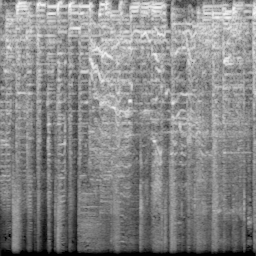

In [6]:
output = pipe()
display(output.images[0])

In [7]:
display(Audio(output.audios[0], rate=mel.get_sample_rate()))

In [8]:
from datasets import load_dataset

In [9]:
ds = load_dataset('teticio/audio-diffusion-256')
type(ds)

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 887.31it/s]


Dataset parquet downloaded and prepared to /home/ramonperez/.cache/huggingface/datasets/teticio___parquet/teticio--audio-diffusion-256-09d174a5724b0931/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


100%|██████████| 1/1 [00:00<00:00, 412.70it/s]


datasets.dataset_dict.DatasetDict

In [12]:
from audiodiffusion.audio_encoder import AudioEncoder

audio_encoder = AudioEncoder.from_pretrained("teticio/audio-encoder")
# audio_encoder.encode(<list of audio files>)

In [15]:
audio_encoder?

Signature:       audio_encoder(*args, **kwargs)
Type:            AudioEncoder
String form:    
AudioEncoder(
           (conv_blocks): ModuleList(
           (0): ConvBlock(
           (sep_conv): SeparableConv2d( <...> (p=0.5, inplace=False)
           )
           (embedding): Linear(in_features=1024, out_features=100, bias=True)
           )
File:            ~/anaconda/envs/vdb_audio/lib/python3.10/site-packages/audiodiffusion/audio_encoder.py
Docstring:       <no docstring>
Class docstring:
Base class for all models.

[`ModelMixin`] takes care of storing the configuration of the models and handles methods for loading, downloading
and saving models.

    - **config_name** ([`str`]) -- A filename under which the model should be stored when calling
      [`~models.ModelMixin.save_pretrained`].
Init docstring:  Initializes internal Module state, shared by both nn.Module and ScriptModule.

In [18]:
audio_encoder.embedding

Signature:      audio_encoder.embedding(*args, **kwargs)
Type:           Linear
String form:    Linear(in_features=1024, out_features=100, bias=True)
File:           ~/anaconda/envs/vdb_audio/lib/python3.10/site-packages/torch/nn/modules/linear.py
Source:        
class Linear(Module):
    r"""Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

    This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

    On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.

    Args:
        in_features: size of each input sample
        out_features: size of each output sample
        bias: If set to ``False``, the layer will not learn an additive bias.
            Default: ``True``

    Shape:
        - Input: :math:`(*, H_{in})` where :math:`*` means any number of
          dimensions including none and :math:`H_{in} = \text{in\_features}`.
        - Output: :math:`(*, H_{out})` where all but the

In [1]:
import requests
import torch
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

/home/ramonperez/anaconda/envs/vdb_audio/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]



































































































































































































































































































































































































































































































































Fetching 15 files:  27%|██▋       | 4/15 [04:16<12:42, 69.27s/it]











































































































































































































































































































































































In [ ]:
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))

prompt = "A fantasy landscape, trending on artstation"

images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images
images[0].save("fantasy_landscape.png")

## Audio Diffuser

In [1]:
from diffusers import AudioLDMPipeline
import torch

/home/ramonperez/anaconda/envs/vdb_audio/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
repo_id = "cvssp/audioldm"
pipe = AudioLDMPipeline.from_pretrained(repo_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

In [11]:
prompt = "contemporary salsa music"
audio = pipe(prompt, num_inference_steps=10, audio_length_in_s=5.0).audios[0]

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 16.40it/s]


In [12]:
from IPython.display import Audio

Audio(audio, rate=16000)

## Testing AutoModel

In [14]:
from transformers import AutoModel

In [17]:
model_name = "facebook/wav2vec2-base"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_name).to(device)

/home/ramonperez/anaconda/envs/vdb_audio/lib/python3.10/site-packages/transformers/configuration_utils.py:379: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2Model: ['project_hid.bias', 'quantizer.codevectors', 'project_q.bias', 'project_hid.weight', 'quantizer.weight_proj.weight', 'project_q.weight', 'quantizer.weight_proj.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpo